# Data Preprocessing

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers.convolutional import Conv2D
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
from PIL import Image
warnings.simplefilter(action='ignore',category=FutureWarning)
%matplotlib inline

In [2]:
physical_device=tf.config.experimental.list_physical_devices('GPU')
print("No. of GPUs Available: ",len(physical_device))
tf.config.experimental.set_memory_growth(physical_device[0],True)

No. of GPUs Available:  1


In [3]:
os.chdir('D:/Dataset COVID-19 Augmented')
if os.path.isdir('D:/Dataset COVID-19 Augmented/COVID-19') is False:
    os.makedirs('D:/Dataset COVID-19 Augmented/train/covid')
    os.makedirs('D:/Dataset COVID-19 Augmented/train/noncovid')
    os.makedirs('D:/Dataset COVID-19 Augmented/valid/covid')
    os.makedirs('D:/Dataset COVID-19 Augmented/valid/noncovid')
    os.makedirs('D:/Dataset COVID-19 Augmented/test/covid')
    os.makedirs('D:/Dataset COVID-19 Augmented/test/noncovid')
    
    for i in random.sample(glob.glob('D:/Dataset COVID-19 Augmented/COVID-19/*'),700):
        shutil.move(i,'D:/Dataset COVID-19 Augmented/train/covid')
    for i in random.sample(glob.glob('D:/Dataset COVID-19 Augmented/Non-COVID-19/*'),700):
        shutil.move(i,'D:/Dataset COVID-19 Augmented/train/noncovid')
    for i in random.sample(glob.glob('D:/Dataset COVID-19 Augmented/COVID-19/*'),100):
        shutil.move(i,'D:/Dataset COVID-19 Augmented/valid/covid')
    for i in random.sample(glob.glob('D:/Dataset COVID-19 Augmented/Non-COVID-19/*'),100):
        shutil.move(i,'D:/Dataset COVID-19 Augmented/valid/noncovid')
    for i in random.sample(glob.glob('D:/Dataset COVID-19 Augmented/COVID-19/*'),100):
        shutil.move(i,'D:/Dataset COVID-19 Augmented/test/covid')
    for i in random.sample(glob.glob('D:/Dataset COVID-19 Augmented/Non-COVID-19/*'),100):
        shutil.move(i,'D:/Dataset COVID-19 Augmented/test/noncovid')
os.chdir('../../')

In [4]:
train_path = 'D:/Dataset COVID-19 Augmented/train'
valid_path = 'D:/Dataset COVID-19 Augmented/valid'
test_path = 'D:/Dataset COVID-19 Augmented/test'

In [5]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['covid', 'noncovid'], batch_size=5)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['covid', 'noncovid'], batch_size=5)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['covid', 'noncovid'], batch_size=5, shuffle=False)

Found 1400 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [6]:
imgs, labels = next(train_batches)

In [7]:
imgs1,labels1=next(test_batches)

In [8]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


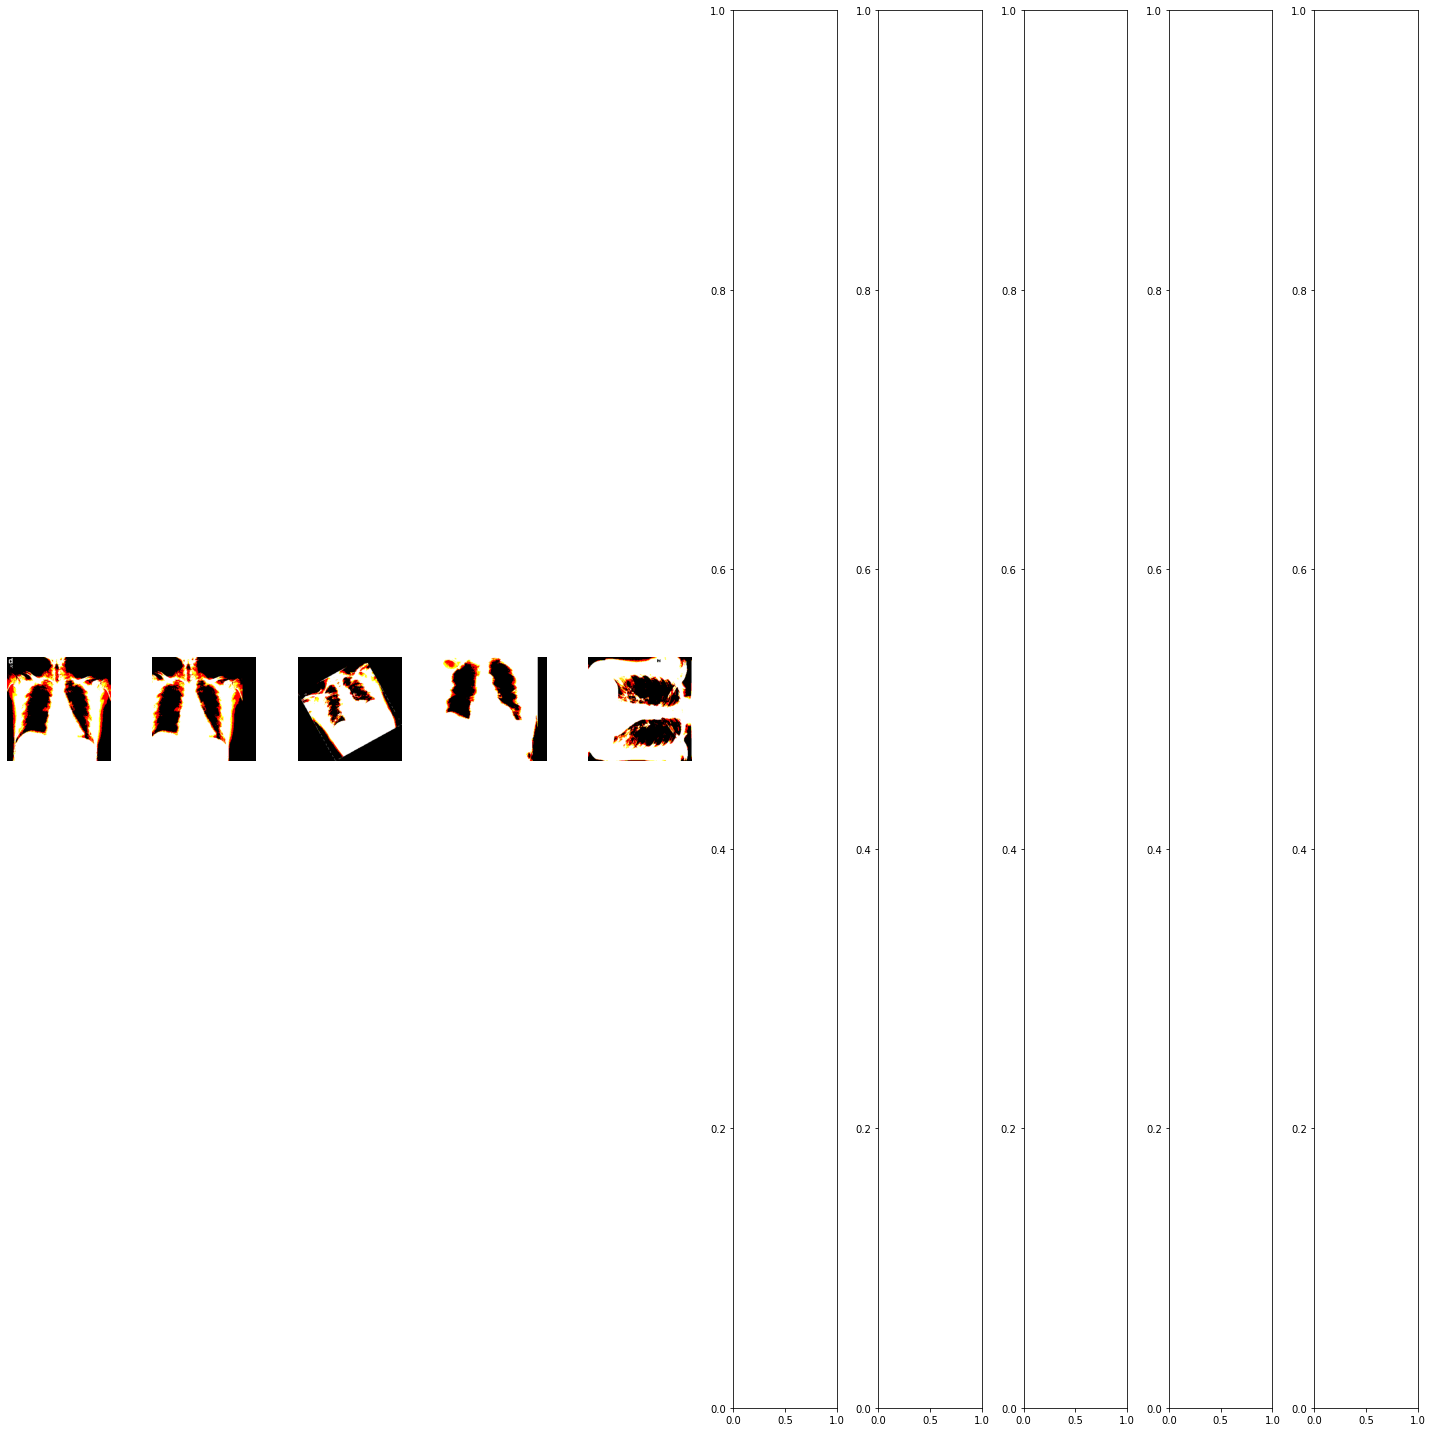

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [9]:
plotImages(imgs1)
print(labels1)

# VGG16 model

In [10]:
vgg16_model=tf.keras.applications.vgg16.VGG16()

In [11]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [12]:
type(vgg16_model)

tensorflow.python.keras.engine.functional.Functional

In [16]:
model=Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [18]:
for layer in model.layers:
    layer.trainable = False

In [19]:
model.add(Dense(units=2,activation='softmax'))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [21]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
model.fit(x=train_batches,validation_data=valid_batches,epochs=5,verbose=1)

Epoch 1/5
280/280 [==============================] - 63s 225ms/step - loss: 0.1347 - accuracy: 0.9493 - val_loss: 0.0591 - val_accuracy: 0.9850
Epoch 2/5
280/280 [==============================] - 23s 83ms/step - loss: 0.0467 - accuracy: 0.9893 - val_loss: 0.0409 - val_accuracy: 0.9800
Epoch 3/5
280/280 [==============================] - 24s 85ms/step - loss: 0.0315 - accuracy: 0.9900 - val_loss: 0.0303 - val_accuracy: 0.9850
Epoch 4/5
280/280 [==============================] - 25s 88ms/step - loss: 0.0241 - accuracy: 0.9943 - val_loss: 0.0236 - val_accuracy: 0.9950
Epoch 5/5
280/280 [==============================] - 25s 90ms/step - loss: 0.0178 - accuracy: 0.9957 - val_loss: 0.0189 - val_accuracy: 1.0000


In [23]:
import os.path
if os.path.isfile('D:/datasetcollection/models/vgg16.h5') is False:
    model.save('D:/datasetcollection/vgg16_without_change.h5')

In [24]:
from tensorflow.keras.models import load_model
new_model=load_model('D:/datasetcollection/vgg16_without_change.h5')

In [25]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [26]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [27]:
np.round(predictions)

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [28]:
predictions.shape

(200, 2)

In [29]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

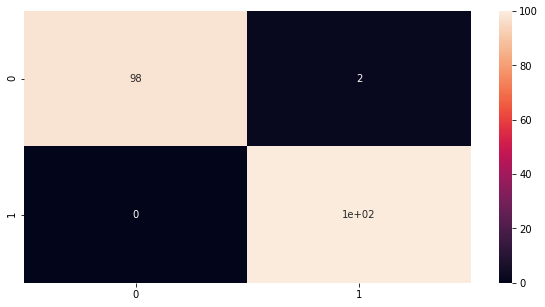

In [30]:
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.heatmap(cm, annot=True)
plt.show()